MACHINE LEARNING TEST 1 – (2/7/2022) TIME: 2 hrs

By Amizuku Francis

In [114]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

</b2>Visualize the Historical Data</b2>

In [4]:
url='https://www.worldometers.info/world-population/uganda-population/'
page= requests.get(url)
soup=BeautifulSoup(page.text, 'lxml')

In [5]:
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Uganda Population (2022) - Worldometer</title> <meta content="Population of Uganda: current, historical, and projected population, growth rate, immigration, median age, total fertility rate (TFR), population density, urbanization, urban population, country's share of world population, and global rank. Data tables, maps, charts, and live population clock" name="description"/><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" 

In [6]:
table=soup.find('table', {'class': 'table table-striped table-bordered table-hover table-condensed table-list'})
headers=[]

In [7]:
for i in table.find_all('th'):
    title= i.text.strip()
    headers.append(title)

In [8]:
df= pd.DataFrame(columns=headers)

In [9]:
for row in table.find_all('tr')[1:]:
    data=row.find_all('td')
    row_data=[td.text.strip() for td in data]
    length= len(df)
    df.loc[length]=row_data

In [10]:
df.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,UgandaGlobal Rank
0,2020,"45,741,007",3.32 %,"1,471,413","168,694",16.7,5.01,229,25.7 %,"11,775,012",0.59 %,"7,794,798,739",31
1,2019,"44,269,594",3.61 %,"1,540,558","168,694",16.1,5.62,222,25.2 %,"11,135,655",0.57 %,"7,713,468,100",32
2,2018,"42,729,036",3.80 %,"1,562,448","168,694",16.1,5.62,214,24.6 %,"10,525,083",0.56 %,"7,631,091,040",33
3,2017,"41,166,588",3.83 %,"1,517,422","168,694",16.1,5.62,206,24.2 %,"9,942,312",0.55 %,"7,547,858,925",34
4,2016,"39,649,166",3.72 %,"1,423,713","168,694",16.1,5.62,198,23.7 %,"9,386,309",0.53 %,"7,464,022,049",35


In [12]:
df = df.replace(',', '', regex=True)
df = df.replace('%', '', regex=True)

In [13]:
df.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,UgandaGlobal Rank
0,2020,45741007,3.32,1471413,168694,16.7,5.01,229,25.7,11775012,0.59,7794798739,31
1,2019,44269594,3.61,1540558,168694,16.1,5.62,222,25.2,11135655,0.57,7713468100,32
2,2018,42729036,3.80,1562448,168694,16.1,5.62,214,24.6,10525083,0.56,7631091040,33
3,2017,41166588,3.83,1517422,168694,16.1,5.62,206,24.2,9942312,0.55,7547858925,34
4,2016,39649166,3.72,1423713,168694,16.1,5.62,198,23.7,9386309,0.53,7464022049,35


In [14]:
df.shape

(18, 13)

In [43]:
df1=df[['Year', 'Population', 'Yearly Change', 'Fertility Rate','World Population']]
df1.head()

,Year,Population,Yearly Change,Fertility Rate,World Population
0,2020,45741007,1471413,5.01,7794798739
1,2019,44269594,1540558,5.62,7713468100
2,2018,42729036,1562448,5.62,7631091040
3,2017,41166588,1517422,5.62,7547858925
4,2016,39649166,1423713,5.62,7464022049


In [48]:
cdf=df1[['Year', 'Population', 'Yearly Change', 'Fertility Rate','World Population']]
cdf.head()

,Year,Population,Yearly Change,Fertility Rate,World Population
0,2020,45741007,1471413,5.01,7794798739
1,2019,44269594,1540558,5.62,7713468100
2,2018,42729036,1562448,5.62,7631091040
3,2017,41166588,1517422,5.62,7547858925
4,2016,39649166,1423713,5.62,7464022049


In [49]:
cdf["Year"]=pd.to_numeric(df1["Year"],errors='ignore')
cdf["Population"]=pd.to_numeric(df1["Population"],errors='ignore')
cdf["Yearly Change"]=pd.to_numeric(df1["Yearly Change"],errors='ignore')
cdf["Fertility Rate"]=pd.to_numeric(df1["Fertility Rate"],errors='ignore')
cdf["World Population"]=pd.to_numeric(df1["World Population"],errors='ignore')

In [50]:
cdf.dtypes

Year                  int64
Population            int64
Yearly Change         int64
Fertility Rate      float64
World Population      int64
dtype: object

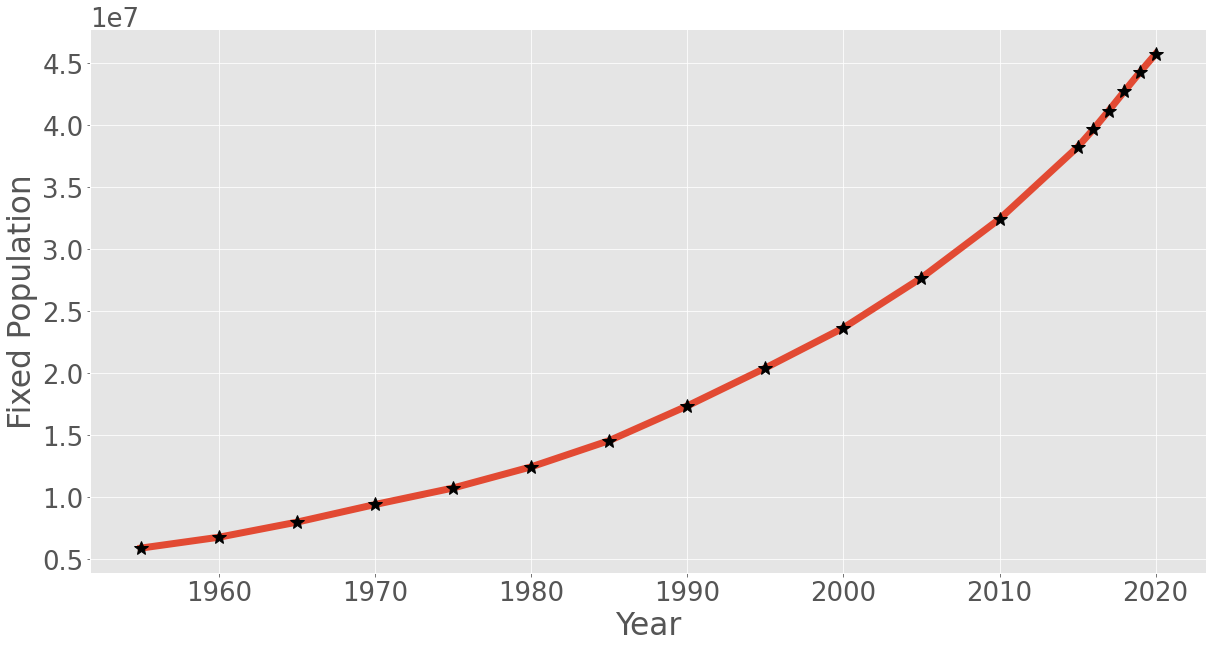

In [51]:
plt.figure(figsize = (20,10))

x = cdf.Year
y = cdf.Population

plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')


plt.xlabel('Year')
plt.ylabel('Fixed Population')

plt.rcParams.update({'font.size': 26})
plt.show()

</b2>Simple Linear Regression: First Order Polynomial</b2>

The slope of line is 631121.5758218013.
The y intercept is -1234056167.0068645.
The best fit simple linear regression line is 631121.5758218013x + -1234056167.0068645.


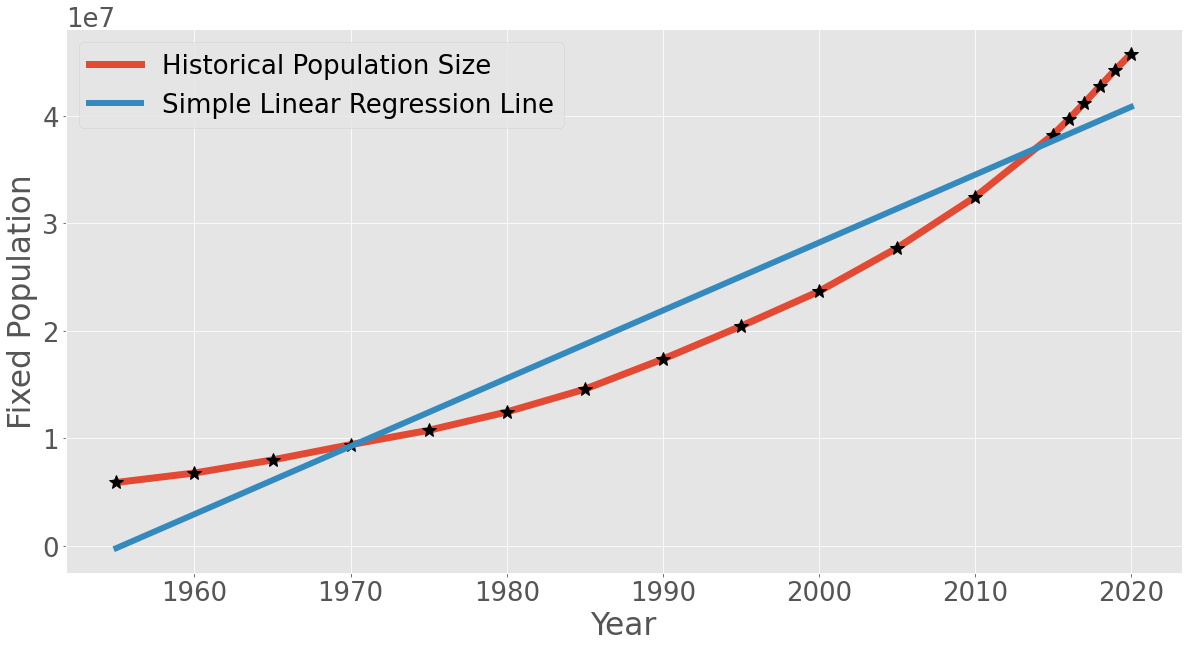

In [52]:
plt.figure(figsize = (20,10))

order = 1

x = cdf.Year
y = cdf.Population

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Population Size', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))

plt.xlabel('Year')
plt.ylabel('Fixed Population')
plt.legend(loc = 'upper left')

plt.rcParams.update({'font.size': 26})
plt.show()

</b>Linear Regression: Higher Order Polynomials</b2>

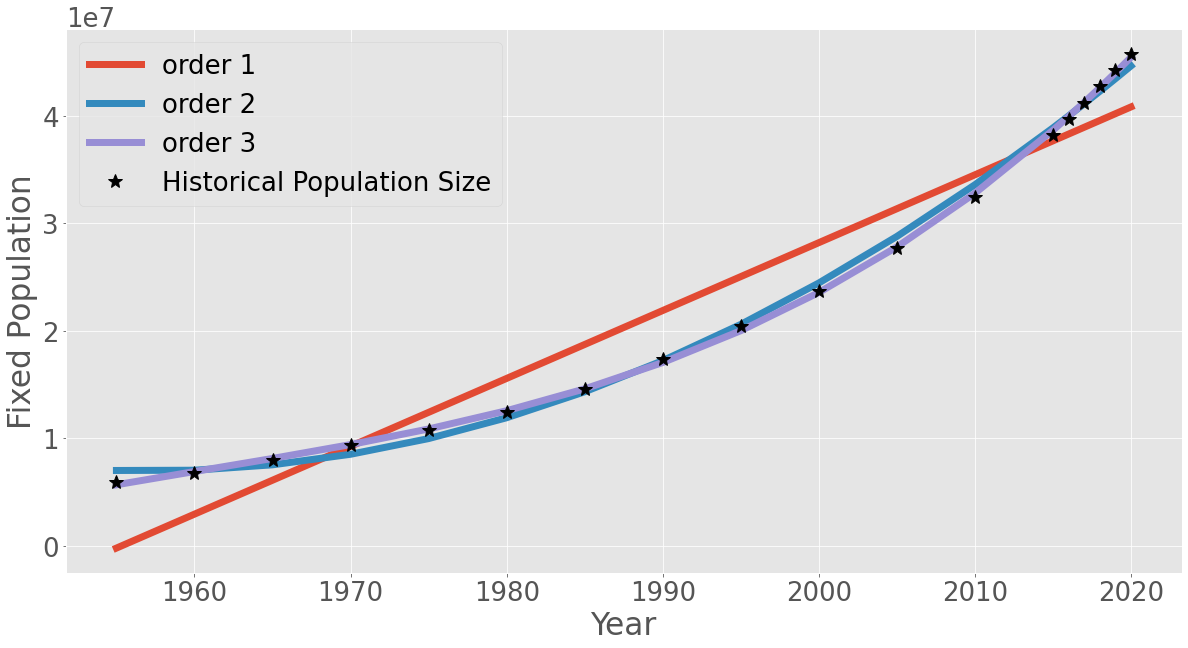

In [53]:
models = []       
errors_hist = []  
mse_hist = []     

for order in range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Population Size', linewidth = 7)
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('Fixed Population')

plt.show()

</b1>For the selected range of year, the difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible. Let's visualize the actual errors.</b1>

</b2>Calculating the Errors</b2>

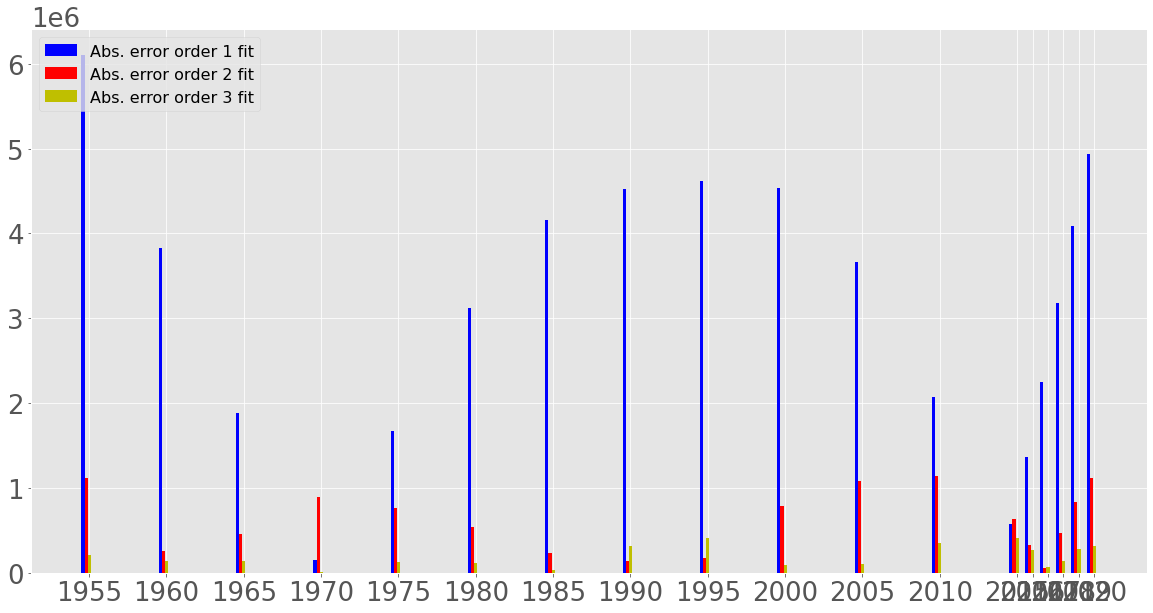

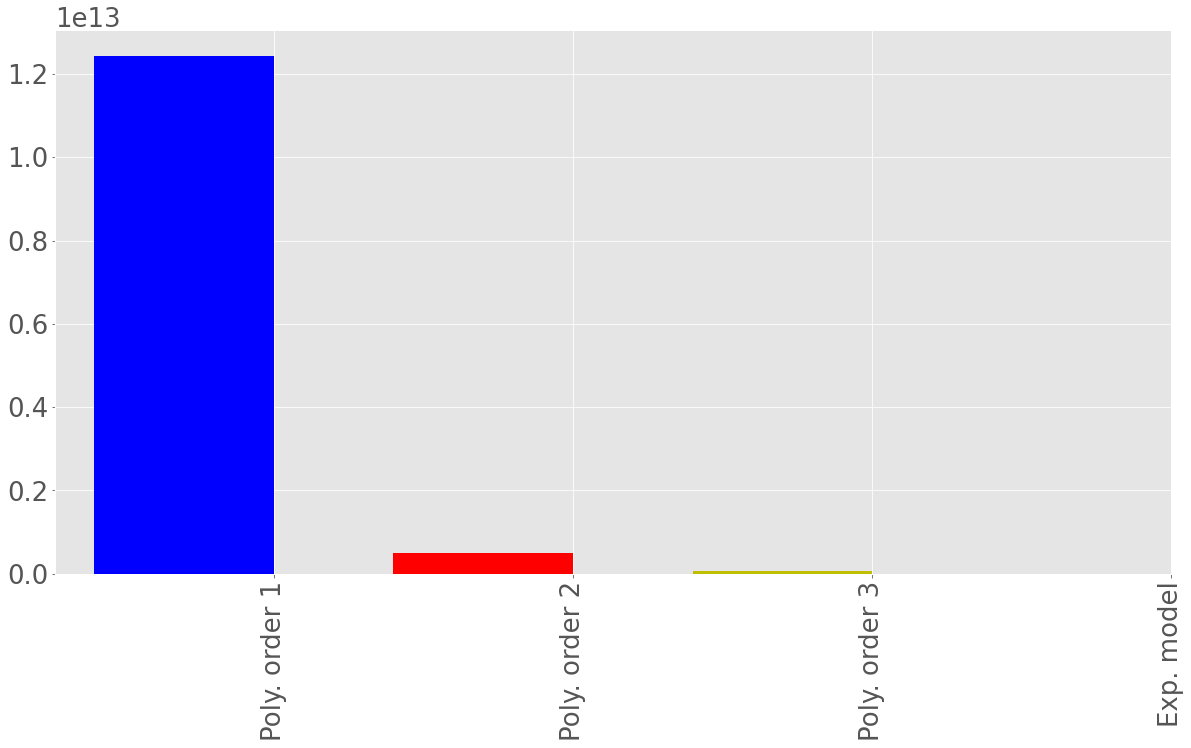

In [61]:
x = cdf.year
width = 0.2   

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3','Exp. model'], rotation=90)
plt.show()

</b2> From the last plot, it seems that a third order polynomial, while not being the true model, fits better the Population measurements in the observed range. </b2>

In [67]:
order = 3

x = cdf.Year.values      
y = cdf.Population.values   

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

p = np.poly1d(p_array)

print(type(p), p)

print('The value of the polynomial for x = 2028 is : {} '.format(p(2028)))

e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 1.15507914e+02 -6.79445717e+05  1.33246338e+09 -8.71183653e+11]
<class 'numpy.poly1d'>        3             2
115.5 x - 6.794e+05 x + 1.332e+09 x - 8.712e+11
The value of the polynomial for x = 2028 is : 58466612.5144043 
The estimated polynomial parameters are:        3             2
115.5 x - 6.794e+05 x + 1.332e+09 x - 8.712e+11
The errors for each value of x, given the estimated polynomial parameters are: 
 [312889.89123535 279221.64123535 136036.95458984  68716.12036133
 267428.53735352 410724.24768066 356051.54650879 101025.0703125
  96451.11706543 411231.95117188 310815.36706543  32704.69909668
 118404.31201172 125578.53674316   6558.43701172 135572.07751465
 137694.52282715 213811.16296387]
The MSE is :53625646540.02404


</b2>Non-Linear Regression Model: Exponential Growth</b>

In [99]:
from scipy.optimize import curve_fit
xx = cdf.Year   
xy = cdf.Population

def exp_func(x,a,b):
    return a*b**x

popt, pcov = curve_fit(exp_func,xx,xy)
yr_predict = exp_func(xx,popt[0],popt[1])

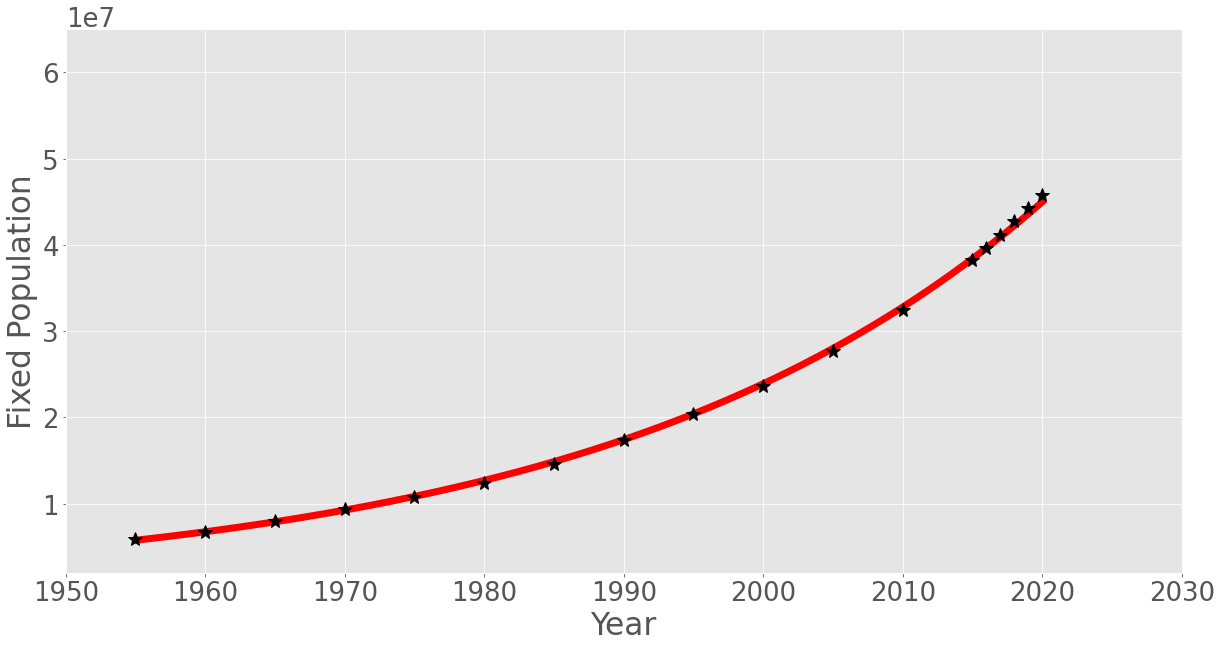

In [101]:
plt.figure(figsize = (20,10))
x1x = cdf.Year   
xy = cdf.Population

p = np.polyfit(x1x, np.log(xy), 1)
a = np.exp(p[1])
b = p[0]

x_fitted = np.linspace(np.min(x1x), np.max(x1x), 1950)
y_fitted = a * np.exp(b * x_fitted)

plt.plot(2016,27946445.571311668,color='blue')
plt.plot(x_fitted, y_fitted,color='red',linewidth=7)
plt.plot(cdf.Year, cdf.Population, '*k', markersize = 14)
# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Population')
plt.axis([1950,2030,0.2e7,6.5e7])
plt.show()

In [75]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [95]:
x = cdf[["Yearly Change"]]
y = cdf["Population"]
lr = LinearRegression()
lr.fit(x, y)
yhat = lr.predict(x)
pd.DataFrame({"Actual Population": y, "Predicted Population": yhat}).head()

,Actual Population,Predicted Population
0,45741007,4.315168e+07
1,44269594,4.502983e+07
2,42729036,4.562442e+07
3,41166588,4.440140e+07
4,39649166,4.185602e+07


</b2>From the last plot, it seems that a third order polynomial</b2>